## Text Analytics of Tweet Emotion - EDA with Plotly

# [Link to my Youtube Video Explaining this whole Notebook](https://www.youtube.com/watch?v=m9ZHNDzMR0Y&list=PLxqBkZuBynVQEvXfJpq3smfuKq3AiNW-N&index=2)

[![Imgur](https://imgur.com/8WtJCaZ.png)](https://www.youtube.com/watch?v=m9ZHNDzMR0Y&list=PLxqBkZuBynVQEvXfJpq3smfuKq3AiNW-N&index=2)
---



In [1]:
# !pip install transformers
import pandas as pd
import numpy as np
from transformers import pipeline
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nlp

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:

# https://huggingface.co/docs/transformers/main_classes/pipelines

# An example of a negative customer review for Netflix
# taken from https://www.sitejabber.com/reviews/netflix.com
text = "I am on the line with a so-called Customer Service that cannot even set proper expectations nor empathize with a customer."

classifier = pipeline('text-classification')

text_class = classifier(text)

pd.DataFrame(text_class)



No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


,label,score
0,NEGATIVE,0.999679


In [3]:
from datasets import list_datasets

all_datasets = list_datasets()

print(f"There are {len(all_datasets)} datasets currently available on the Hub")

print(f"The first 10 are: {all_datasets[:10]}")

There are 5385 datasets currently available on the Hub
The first 10 are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [5]:
from datasets import load_dataset

emotions = load_dataset('emotion')

emotions

Using custom data configuration default
Reusing dataset emotion (/home/paul/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705)
100%|██████████| 3/3 [00:00<00:00, 59.95it/s]


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [8]:
label_names = emotions['train'].features['label'].names
label_names

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [9]:
#length of the data
print('Length Of Data: ',len(train_ds))

# Single example
print("Single example by its index in all taken emotion data: ", train_ds[0])

Length Of Data:  16000
Single example by its index in all taken emotion data:  {'text': 'i didnt feel humiliated', 'label': 0}


In [10]:
print('Column_Names: ', train_ds.column_names)

Column_Names:  ['text', 'label']


In [12]:
print('First 5 rows of data and label: ',train_ds[:5])

First 5 rows of data and label:  {'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


In [13]:
print('First 5 rows of data (Text):',train_ds['text'][:5])

First 5 rows of data (Text): ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']


In [11]:
train = pd.DataFrame(emotions['train'])
train.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [15]:
emotions.set_format(type='pandas')

df = emotions['train'][:]


display(df.tail())

def label_int2str(row):
    return emotions['train'].features['label'].int2str(row)

df['label_name'] = df['label'].apply(label_int2str)

display(df.head())

,text,label
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3
15999,i know a lot but i feel so stupid because i ca...,0


,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


### Class distribution of label_name

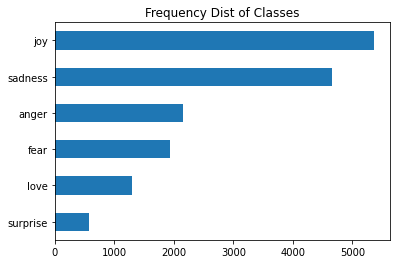

In [17]:
import matplotlib.pyplot as plt

df['label_name'].value_counts(ascending=True).plot.barh()

plt.title('Frequency Dist of Classes')

plt.show()

### Plotly Visualization from the Emotion Train Dataframe

In [19]:
train['length_of_text'] = [len(i.split(" ")) for i in train['text']]

fig = px.histogram(train['length_of_text'], marginal='box', labels={'value': "Length of the Text"} )

fig.update_traces(marker=dict(line=dict(color='#000000', width=2) ))

fig.update_layout(title_text = 'Distribution of the Length of Text by Emotions ', title_x=0.5, title_font=dict(size=20)  )

fig.show()

### Distribution of the Length of the Texts by Emotions

In [21]:
fig = px.histogram(train['length_of_text'], marginal='box', labels={'value': "Length of the Text"}, color=train['label'] )

fig.update_traces(marker=dict(line=dict(color='#000000', width=2) ))

fig.update_layout(title_text = 'Distribution of the Length of Text by Emotions ', title_x=0.5, title_font=dict(size=20)  )

fig.show()

### Distribution of the Labels

In [22]:
fig = px.histogram(train, x = 'label', color='label' )

fig.update_traces(marker=dict(line=dict(color="#000000", width=2 )) )

fig.update_layout(title_text='Dist of Labels', title_x=0.5, title_font=dict(size=20))

fig.show()

### Frequency of the Words in the Train Dataset

In [27]:
FreqOfWords = train['text'].str.split(expand=True).stack().value_counts()

FreqOfWords_top200 = FreqOfWords[:200]

FreqOfWords_top200.index



Index(['i', 'feel', 'and', 'to', 'the', 'a', 'feeling', 'that', 'of', 'my',
       ...
       'few', 'year', 'thought', 'first', 'times', 'family', 'started', 'able',
       'said', 'week'],
      dtype='object', length=200)

In [28]:
fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0)

fig.update_layout(title_text = 'Freq of the words in Train Dataset', title_x = 0.5, title_font=dict(size=20))

fig.update_traces(textinfo='label+value')
fig.show()

/home/paul/.local/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




## Text Pre-Processing

According to graph above, the most frequent words include stopwords such as "i", "and", "to", etc. For the further steps, I will remove them.

---

In [29]:
train.head()

,text,label,length_of_text
0,i didnt feel humiliated,0,4
1,i can go from feeling so hopeless to so damned...,0,21
2,im grabbing a minute to post i feel greedy wrong,3,10
3,i am ever feeling nostalgic about the fireplac...,2,18
4,i am feeling grouchy,3,4


In [30]:
def tokenization(inputs):
    return word_tokenize(inputs)

train['text_tokenized'] = train['text'].apply(tokenization)

train.head()

,text,label,length_of_text,text_tokenized
0,i didnt feel humiliated,0,4,"[i, didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,0,21,"[i, can, go, from, feeling, so, hopeless, to, ..."
2,im grabbing a minute to post i feel greedy wrong,3,10,"[im, grabbing, a, minute, to, post, i, feel, g..."
3,i am ever feeling nostalgic about the fireplac...,2,18,"[i, am, ever, feeling, nostalgic, about, the, ..."
4,i am feeling grouchy,3,4,"[i, am, feeling, grouchy]"


### Stopword Removal

In [32]:
stop_words = set(stopwords.words('english'))

def stopwords_remove(inputs):
    return [item for item in inputs if item not in stop_words]

train['text_after_removing_stopwords'] = train['text_tokenized'].apply(stopwords_remove)

train.head()

,text,label,length_of_text,text_tokenized,text_after_removing_stopwords
0,i didnt feel humiliated,0,4,"[i, didnt, feel, humiliated]","[didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,0,21,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing a minute to post i feel greedy wrong,3,10,"[im, grabbing, a, minute, to, post, i, feel, g...","[im, grabbing, minute, post, feel, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,2,18,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st..."
4,i am feeling grouchy,3,4,"[i, am, feeling, grouchy]","[feeling, grouchy]"


### Lemmatization

In [33]:
lemmatizer = WordNetLemmatizer()

def lemmatization(inputs):
    return [lemmatizer.lemmatize(word=x, pos='v') for x in inputs]

train['text_lemmatized'] = train['text_after_removing_stopwords'].apply(lemmatization)

train.head()

,text,label,length_of_text,text_tokenized,text_after_removing_stopwords,text_lemmatized
0,i didnt feel humiliated,0,4,"[i, didnt, feel, humiliated]","[didnt, feel, humiliated]","[didnt, feel, humiliate]"
1,i can go from feeling so hopeless to so damned...,0,21,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun...","[go, feel, hopeless, damn, hopeful, around, so..."
2,im grabbing a minute to post i feel greedy wrong,3,10,"[im, grabbing, a, minute, to, post, i, feel, g...","[im, grabbing, minute, post, feel, greedy, wrong]","[im, grab, minute, post, feel, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,2,18,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st...","[ever, feel, nostalgic, fireplace, know, still..."
4,i am feeling grouchy,3,4,"[i, am, feeling, grouchy]","[feeling, grouchy]","[feel, grouchy]"


## Joining Tokens into Sentences

In [34]:
train['text_cleaned'] = train['text_lemmatized'].str.join(' ')

train.head()

,text,label,length_of_text,text_tokenized,text_after_removing_stopwords,text_lemmatized,text_cleaned
0,i didnt feel humiliated,0,4,"[i, didnt, feel, humiliated]","[didnt, feel, humiliated]","[didnt, feel, humiliate]",didnt feel humiliate
1,i can go from feeling so hopeless to so damned...,0,21,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun...","[go, feel, hopeless, damn, hopeful, around, so...",go feel hopeless damn hopeful around someone c...
2,im grabbing a minute to post i feel greedy wrong,3,10,"[im, grabbing, a, minute, to, post, i, feel, g...","[im, grabbing, minute, post, feel, greedy, wrong]","[im, grab, minute, post, feel, greedy, wrong]",im grab minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,2,18,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st...","[ever, feel, nostalgic, fireplace, know, still...",ever feel nostalgic fireplace know still property
4,i am feeling grouchy,3,4,"[i, am, feeling, grouchy]","[feeling, grouchy]","[feel, grouchy]",feel grouchy


## Word Cloud

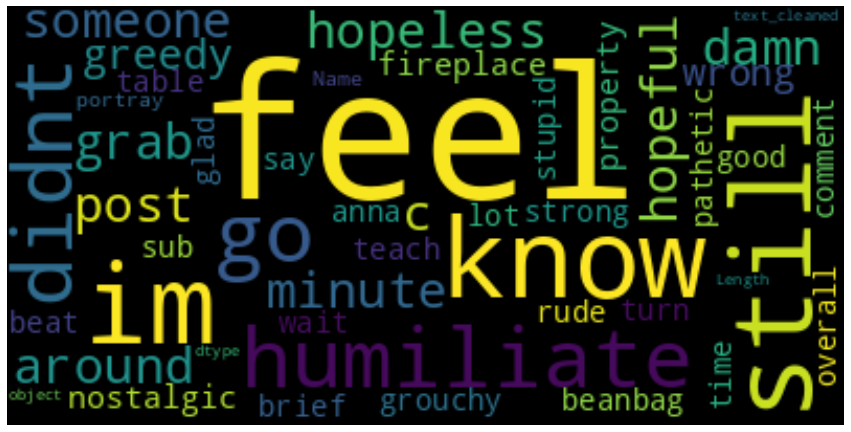

In [35]:
wordcloud = WordCloud(max_words=150, random_state=30, collocations=True).generate(str((train['text_cleaned'])))

plt.figure(figsize=(15, 8))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
FreqOfWords = train['text_cleaned'].str.split(expand=True).stack().value_counts()

FreqOfWords_top200 = FreqOfWords[:200]

FreqOfWords_top200.index


fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0)

fig.update_layout(title_text = 'Freq of the words in Train Dataset', title_x = 0.5, title_font=dict(size=20))

fig.update_traces(textinfo='label+value')
fig.show()

/home/paul/.local/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

